In [1]:
# mencari directory saat ini
import os
os.getcwd()

'C:\\Users\\KOMPUTER\\Documents\\Jupyter Notebooks'

In [2]:
# Merubah directory
os.chdir('D:\\ITS\\Tugas Akhir\\Source Code')
# Merubah directory (beneran)
os.chdir('D:/ITS/Tugas Akhir/Source Code')

In [3]:
import numpy as np
import pandas as pd
import glob 

In [4]:
cur_path = "D:/ITS/Tugas Akhir/data/Endaq CSV/"

In [5]:
normal_file_names = glob.glob(cur_path+'/normal/*.csv')
imnormal_misalignment = glob.glob(cur_path+'/misalignment/*.csv')
imnormal_unbalance = glob.glob(cur_path+'/unbalance/*.csv')
imnormal_bearing = glob.glob(cur_path+'/bearing/*.csv')

In [6]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [7]:
data_normal = dataReader(normal_file_names)
data_misalignment = dataReader(imnormal_misalignment)
data_unbalance = dataReader(imnormal_unbalance)
data_bearing = dataReader(imnormal_bearing)

In [8]:
# DOWN SAMPLING

def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [9]:
data_normal = downSampler(data_normal, 0, 5000)
data_misalignment = downSampler(data_misalignment, 0, 5000)
data_unbalance = downSampler(data_unbalance, 0, 5000)
data_bearing = downSampler(data_bearing, 0, 5000)

In [10]:
data_misalignment

,0,1,2,3
0,0.130474,0.012886,0.009876,-0.010109
1,0.380527,0.026833,0.028392,-0.016349
2,0.630527,-0.007332,-0.015320,-0.013292
3,0.880534,0.015834,0.023270,-0.004290
4,1.130533,-0.000268,0.000020,-0.005971
...,...,...,...,...
993,3.663596,0.005334,0.009432,-0.003525
994,3.913604,-0.006480,-0.014145,0.000059
995,4.163604,0.025339,0.029569,0.000994
996,4.413611,-0.007813,-0.020164,-0.000312


In [11]:
len(data_misalignment)

998

In [12]:
# FFT

from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [13]:
data_normal = FFT(data_normal)
data_misalignment = FFT(data_misalignment)
data_unbalance = FFT(data_unbalance)
data_bearing = FFT(data_bearing)

In [62]:
y_1 = pd.DataFrame(np.full((int(len(data_normal)),1),0))
y_2 = pd.DataFrame(np.full((int(len(data_misalignment)),1),1))
y_3 = pd.DataFrame(np.full((int(len(data_unbalance)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_bearing)),1),3))
y = pd.concat([y_1,y_2,y_3,y_4], ignore_index=False)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
2030,3
2031,3
2032,3
2033,3


In [63]:
data = pd.concat([data_normal,data_misalignment,data_unbalance,data_bearing],ignore_index=True)

In [64]:
data

,0,1,2,3,4,5,6
0,0.623005,0.067794,0.091318,-0.073082,-0.000054,-4.094008e-05,-0.000001
1,2.421297,0.107115,0.143096,-0.113841,-0.000011,-1.747493e-04,0.000053
2,5.332108,0.164318,0.196033,-0.178904,-0.000081,-2.288879e-04,0.000073
3,9.292989,0.175975,0.236218,-0.186550,-0.000127,-3.708794e-04,0.000153
4,14.241381,0.203066,0.261488,-0.214558,-0.000054,-2.388535e-04,0.000040
...,...,...,...,...,...,...,...
12153,13.911024,0.389112,0.279515,-0.191630,-0.002046,5.075877e-07,-0.000039
12154,9.099801,0.311068,0.265596,-0.169323,-0.001052,1.433499e-04,-0.000063
12155,5.240580,0.299905,0.243329,-0.169188,0.000163,2.534752e-04,-0.000143
12156,2.395820,0.213578,0.196326,-0.130663,0.000337,2.986973e-04,-0.000143


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, shuffle=True)

In [66]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (9726, 7)
Shape of Test Data : (2432, 7)


In [67]:
import tensorflow as tf
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (9726, 7, 1)
Shape of Test Data : (2432, 7, 1)


In [68]:
import keras
from keras import models
from keras import layers


input_shape=(7,1)

model = models.Sequential()
model.add(layers.Conv1D(128, 2, input_shape=input_shape , activation='relu'))
model.add(layers.Conv1D(128, 2, activation='relu'))
model.add(layers.Conv1D(96, 2, activation='relu'))
model.add(layers.Conv1D(64, 2, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 6, 128)            384       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 5, 128)            32896     
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 4, 96)             24672     
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 3, 64)             12352     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                

In [69]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png')

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [70]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

C:\Users\KOMPUTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [71]:
hist = model.fit(X_train , y_train , epochs=200, validation_split=0.2)
#batch_size = 25
#num_epochs = 100
#hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, )

Epoch 1/200
244/244 [==============================] - 1s 5ms/step - loss: 1.8630 - accuracy: 0.7504 - val_loss: 0.3510 - val_accuracy: 0.8345
Epoch 2/200
244/244 [==============================] - 1s 4ms/step - loss: 0.2888 - accuracy: 0.8667 - val_loss: 0.1941 - val_accuracy: 0.8972
Epoch 3/200
244/244 [==============================] - 1s 4ms/step - loss: 0.2053 - accuracy: 0.9072 - val_loss: 0.1614 - val_accuracy: 0.9239
Epoch 4/200
244/244 [==============================] - 1s 4ms/step - loss: 0.1750 - accuracy: 0.9193 - val_loss: 0.1591 - val_accuracy: 0.9203
Epoch 5/200
244/244 [==============================] - 1s 4ms/step - loss: 0.1746 - accuracy: 0.9252 - val_loss: 0.1448 - val_accuracy: 0.9327
Epoch 6/200
244/244 [==============================] - 1s 4ms/step - loss: 0.1496 - accuracy: 0.9342 - val_loss: 0.1316 - val_accuracy: 0.9430
Epoch 7/200
244/244 [==============================] - 1s 4ms/step - loss: 0.1515 - accuracy: 0.9355 - val_loss: 0.1323 - val_accuracy: 0.9399

244/244 [==============================] - 1s 4ms/step - loss: 0.1028 - accuracy: 0.9559 - val_loss: 0.1091 - val_accuracy: 0.9476
Epoch 58/200
244/244 [==============================] - 1s 4ms/step - loss: 0.1326 - accuracy: 0.9509 - val_loss: 0.1084 - val_accuracy: 0.9496
Epoch 59/200
244/244 [==============================] - 1s 4ms/step - loss: 0.1022 - accuracy: 0.9563 - val_loss: 0.0936 - val_accuracy: 0.9553
Epoch 60/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0981 - accuracy: 0.9568 - val_loss: 0.1322 - val_accuracy: 0.9476
Epoch 61/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0932 - accuracy: 0.9614 - val_loss: 0.1052 - val_accuracy: 0.9548
Epoch 62/200
244/244 [==============================] - 1s 4ms/step - loss: 0.1003 - accuracy: 0.9563 - val_loss: 0.1456 - val_accuracy: 0.9337
Epoch 63/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0973 - accuracy: 0.9591 - val_loss: 0.1108 - val_accuracy: 0.9450
Epoch

Epoch 114/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0802 - accuracy: 0.9648 - val_loss: 0.0911 - val_accuracy: 0.9573
Epoch 115/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0772 - accuracy: 0.9659 - val_loss: 0.0850 - val_accuracy: 0.9620
Epoch 116/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0722 - accuracy: 0.9684 - val_loss: 0.0882 - val_accuracy: 0.9599
Epoch 117/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0831 - accuracy: 0.9661 - val_loss: 0.0951 - val_accuracy: 0.9558
Epoch 118/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0798 - accuracy: 0.9649 - val_loss: 0.0899 - val_accuracy: 0.9579
Epoch 119/200
244/244 [==============================] - 1s 4ms/step - loss: 0.3723 - accuracy: 0.9614 - val_loss: 0.1013 - val_accuracy: 0.9491
Epoch 120/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0855 - accuracy: 0.9638 - val_loss: 0.0898 - val_ac

244/244 [==============================] - 1s 4ms/step - loss: 0.0779 - accuracy: 0.9675 - val_loss: 0.0766 - val_accuracy: 0.9666
Epoch 171/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0751 - accuracy: 0.9674 - val_loss: 0.0829 - val_accuracy: 0.9615
Epoch 172/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0752 - accuracy: 0.9652 - val_loss: 0.0834 - val_accuracy: 0.9625
Epoch 173/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0799 - accuracy: 0.9649 - val_loss: 0.1484 - val_accuracy: 0.9419
Epoch 174/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0827 - accuracy: 0.9623 - val_loss: 0.0853 - val_accuracy: 0.9604
Epoch 175/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0741 - accuracy: 0.9670 - val_loss: 0.1071 - val_accuracy: 0.9532
Epoch 176/200
244/244 [==============================] - 1s 4ms/step - loss: 0.0775 - accuracy: 0.9653 - val_loss: 0.0783 - val_accuracy: 0.9625

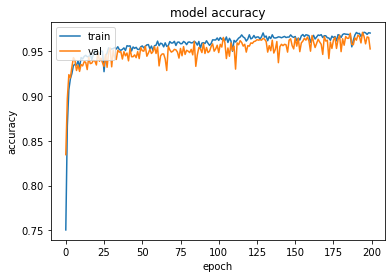

In [72]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

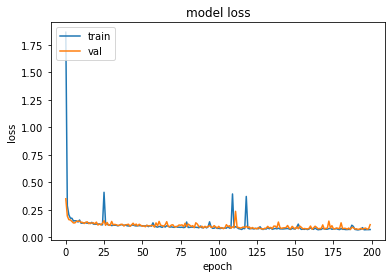

In [73]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [74]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9636027216911316
Testing Accuracy:  0.9605262875556946


In [75]:
preds = model.predict(X_test) # label scores 

classpreds = np.argmax(preds, axis=1) # predicted classes 

y_testclass = np.argmax(y_test, axis=1) # true classes

n_classes=4 # number of classes

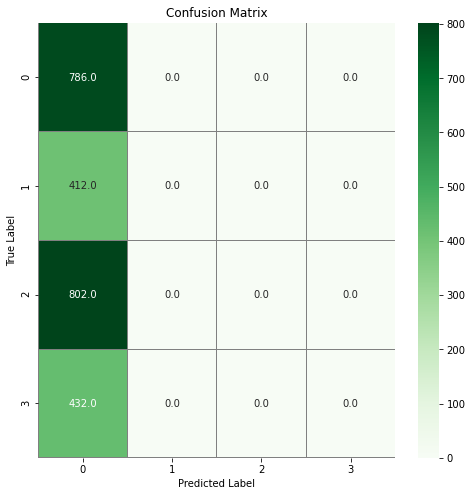

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Y_pred = model.predict(X_test)
#Y_pred_classes = np.argmax(Y_pred,axis = 1) 
#Y_true = np.argmax(y_test,axis = 0) 

#confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx = confusion_matrix(classpreds, y_testclass) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

[[786   0   0   0]
 [412   0   0   0]
 [802   0   0   0]
 [432   0   0   0]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

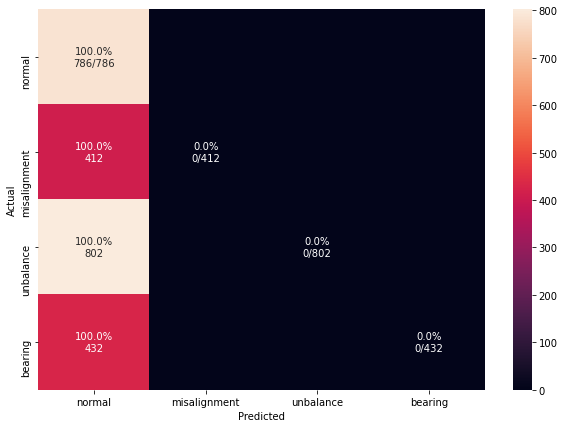

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
c_names = ['normal', 'misalignment', 'unbalance', 'bearing']
cm = confusion_matrix (classpreds, y_testclass)
print(cm)

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = c_names, columns = c_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')